In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

import os
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

# Variables for pre-processing and training.
batch_size = 128
epochs = 2
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [3]:
cd ..

C:\Users\ADMIN


In [6]:
cd ADMIN

C:\Users\ADMIN


In [7]:
cd downloads

C:\Users\ADMIN\downloads


In [8]:
validation_generator = ImageDataGenerator(rescale=1./255, validation_split=0.25)
train_generator = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, brightness_range=(0.7, 1.3), shear_range=10.0, zoom_range=0.2, horizontal_flip=True, validation_split=0.25)
train_data_gen = train_generator.flow_from_directory(directory="catdog/train/train", target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, shuffle=True, class_mode='binary', subset="training")
val_data_gen = validation_generator.flow_from_directory(directory="catdog/train/train", target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, shuffle=True, class_mode='binary', subset="validation")

Found 18750 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.


In [9]:
#Plot image function
def plotImages(images_arr):
    fig = plt.figure(figsize=(3, 3 * len(images_arr)))
    dem = 0
    for img in images_arr:
        dem += 1
        fig.add_subplot(len(images_arr), 1, dem)
        plt.imshow(img)
    plt.show()

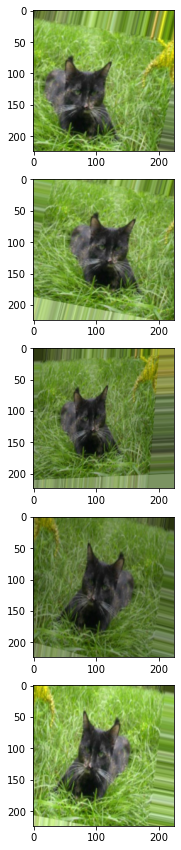

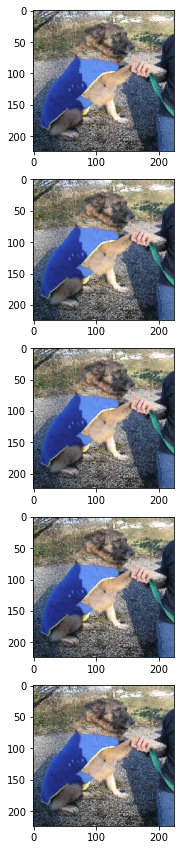

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

augmented_images = [val_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [11]:
#Three Block VGG Model: 64%
model = Sequential([
    #Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    #Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    #Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    #Flatten and Dense layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

C:\Users\ADMIN\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
#Three Block VGG Model + Dropout: 61%
model = Sequential([
    #Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    #Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    #Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    #Dropout, Dense and Flatten layers
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [13]:
# VGG16 model 90%

# load VGG16 base model
# Include_top is set to False, in order to exclude the model's fully-connected layers.
conv_base = VGG16(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# because vgg16 is pre-trained model, no need to train again 
for layer in conv_base.layers:
    layer.trainable = False
    
# add flatten and dense layer
output = conv_base.output
output = Flatten()(output)
output = Dense(128, activation='relu')(output)
output = Dense(1, activation='sigmoid')(output)

# define new model
model = Model(inputs=conv_base.inputs, outputs=output)

# compile model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 15s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                             

In [14]:
#Use model.fit to train model
epochs = 2
history = model.fit(x=train_data_gen, steps_per_epoch=16, epochs=epochs, validation_data=val_data_gen, validation_steps=16, verbose=1)

Epoch 1/2
16/16 [==============================] - 423s 27s/step - loss: 0.6622 - accuracy: 0.6001 - val_loss: 0.5529 - val_accuracy: 0.7393
Epoch 2/2
16/16 [==============================] - 423s 27s/step - loss: 0.5692 - accuracy: 0.6797 - val_loss: 0.4346 - val_accuracy: 0.8091


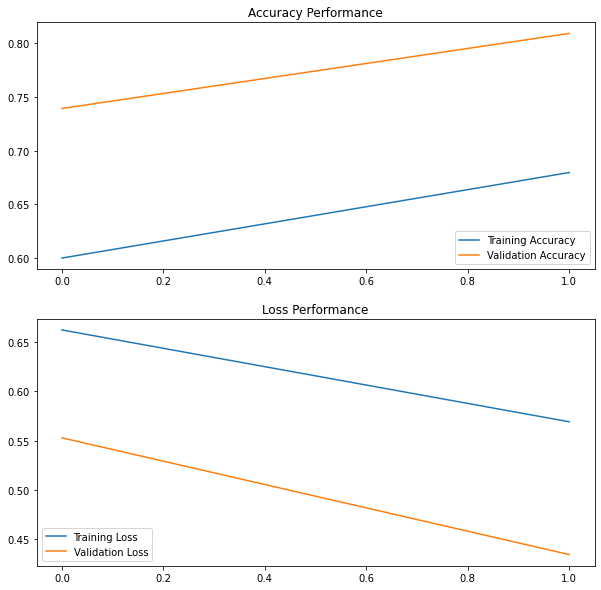

In [15]:
#visualize the accuracy and loss of the model.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Performance')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Loss Performance')

plt.show()

In [17]:
#create test image generator
test_generator = ImageDataGenerator(rescale=1./255)
test_dog_gen = test_generator.flow_from_directory(directory = "catdog/test3-2/dogs", target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, shuffle=False, class_mode='binary')
test_cat_gen = test_generator.flow_from_directory(directory = "catdog/test3-2/cats", target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=batch_size, shuffle=False, class_mode='binary')

Found 2 images belonging to 1 classes.
Found 2 images belonging to 1 classes.


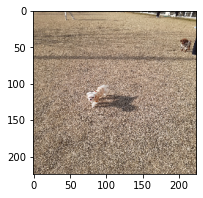

1/1 [==============================] - 0s 252ms/step
cats


In [19]:
#random cat or dog
type_num = random.randint(1, 2)
#1 for cat
#2 for dog

#get random image
img_num = random.randint(1, 2)
x_num = math.floor(img_num / batch_size)
y_num = img_num % batch_size

if type_num == 1: sample_test_images, _ = test_cat_gen[x_num]
else: sample_test_images, _ = test_dog_gen[x_num]
plotImages([sample_test_images[y_num]])

#print prediction
output = model.predict(np.array([sample_test_images[y_num]]))
x = output[0][0]
if (x > 0.5): print("dogs")
else: print("cats")

In [20]:
dog_predictions = model.predict(test_dog_gen)
cat_predictions = model.predict(test_cat_gen)
sum1 = sum(1 if dog > 0.5 else 0 for dog in dog_predictions)
sum2 = sum(1 if cat <= 0.5 else 0 for cat in cat_predictions)
print(f"Your model correctly identified {round((sum1 + sum2)/12500, 2) * 100}% of the images")

1/1 [==============================] - 0s 244ms/step
Your model correctly identified 0.0% of the images
